# Max's Fashion MNIST classifier

Note: GPU runtime is recommended for faster training time (should take ~90 seconds to train with colab GPU)

In [4]:
## imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist
from google.colab import files
from keras.preprocessing import image

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing

%tensorflow_version 2.x

In [5]:
## load and process data

# load the mnist data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# preprocess provided data
def preprocess(img_set):
  # mnist data needs to be reshaped to make the Conv2D layer happy
  # (Conv2D expects that each pixel be an array, not a single value)
  img_set = img_set.reshape(img_set.shape + (1,))

  # also scale it to [0, 1] because neural nets like this better
  img_set = img_set / 255.

  return img_set

# preprocess each set
train_x = preprocess(train_x)
test_x = preprocess(test_x)

print("Train / test shapes: {} {}".format(train_x.shape, test_x.shape))

Train / test shapes: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
## set up and train the model

model = keras.models.Sequential([
  # # flatten the image grid into a vector for the neural layers
  layers.Flatten(input_shape=(28, 28, 1)),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),# i tried other numbers, this was the best
    metrics=["accuracy"]
)

model.summary()

# more than 10 epochs seems to not increase accuracy
history = model.fit(train_x, train_y, epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5079 - accuracy: 0.8207
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3793 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3473 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

In [10]:
## evaluate the model

model.evaluate(test_x, test_y, verbose=2)

313/313 - 1s - loss: 0.3948 - accuracy: 0.8801


[0.3948246240615845, 0.8801000118255615]

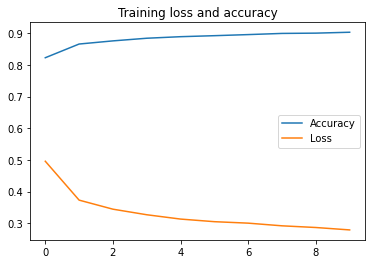

<Figure size 432x288 with 0 Axes>

In [8]:
## plot graph of training accuracy and loss over time

# extract stats
acc = history.history["accuracy"]
loss = history.history["loss"]

num_epochs=range(len(acc))

# graph them
plt.plot(num_epochs, acc)
plt.plot(num_epochs, loss)
plt.title("Training loss and accuracy")
plt.legend(["Accuracy", "Loss"])
plt.figure()

plt.show()